In [21]:
# Install the yfinance library for fetching financial data from Yahoo Finance.
#!pip install yfinance
# Install the pmdarima library, a powerful tool for time series analysis, including AutoARIMA modeling.
#!pip install pmdarima

# Dataset Selection

In [22]:
#import the required libraries for the project
import yfinance as yf
import datetime

# Set the ticker symbol
ticker = "NVDA"

# Calculate the start date as 7 years ago from today
end_date = datetime.datetime.now()
start_date = end_date - datetime.timedelta(days=365 * 7)

# Fetch the stock data from Yahoo Finance
stock_data = yf.download(ticker, start=start_date, end=end_date)

# Display the first few rows of the data
stock_data.head(-10)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-12-08,23.797501,24.155001,23.262501,23.370001,23.034212,38154400
2016-12-09,23.549999,23.567499,22.677500,22.955000,22.625170,38231200
2016-12-12,22.462500,22.487499,21.885000,22.397499,22.075686,60133200
2016-12-13,22.522499,23.072500,22.512501,22.792500,22.465002,38779600
2016-12-14,23.135000,24.277500,22.892500,24.112499,23.766043,98398000
...,...,...,...,...,...,...
2023-11-15,499.350006,499.600006,482.000000,488.880005,488.837036,47549700
2023-11-16,486.790009,495.250000,483.299988,494.799988,494.756500,33975600
2023-11-17,495.239990,497.170013,490.070007,492.980011,492.936676,32520500


# Data Collection and Preprocessing

This dataset contains information about NVIDIA Corporation's stock prices, including Open, High, Low, Close prices, Volume, and Adjusted Close, over the specified time range. It is suitable for analyzing historical stock performance and trends for NVIDIA.

In [23]:
# Import necessary libraries for statistical modeling, data manipulation, and visualization.
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt

# Set the index name of the DataFrame to 'Date' for clarity and consistency.
stock_data.index.name = 'Date'

# Reset the index of the DataFrame to ensure 'Date' becomes a regular column.
stock_data = stock_data.reset_index()



In [24]:
# Display the first few rows of the stock_data DataFrame.
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-12-08,23.797501,24.155001,23.262501,23.370001,23.034212,38154400
1,2016-12-09,23.549999,23.567499,22.677500,22.955000,22.625170,38231200
2,2016-12-12,22.462500,22.487499,21.885000,22.397499,22.075686,60133200
3,2016-12-13,22.522499,23.072500,22.512501,22.792500,22.465002,38779600
4,2016-12-14,23.135000,24.277500,22.892500,24.112499,23.766043,98398000


1. Date: The date of the financial entry.
2. Open Price: The opening price of a financial instrument on that day.
3. High Price: The highest price reached on that day.
4. Low Price: The lowest price reached on that day.
5. Close Price: The closing price of the financial instrument on that day.
6. Adjusted Close Price: The adjusted closing price of the financial stock on that day.
7. Volume: The trading volume for that day.

## Preprocess the data to ensure it is suitable for time series analysis.

In [25]:
# Get the dimensions (number of rows and columns) of the stock_data DataFrame.
stock_data.shape

(1760, 7)

- 1761 Rows: Each row represents a unique day in your dataset. This could be daily financial data, where each row corresponds to a day's worth of information.

- 7 Columns: Each column represents a different variable or feature recorded for each day. Without knowing the specific column names, I can only speculate on the nature of these variables. However, in financial datasets, common features might include things like:


In [26]:
# Check for missing values in each column of the stock_data DataFrame and sum them up.
stock_data.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

There are no null values in the dataset.

In [27]:
# Check for missing values in each column of the stock_data DataFrame and sum them up.
stock_data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

There are no null values in the dataset.

In [28]:
# Display the data types of each column in the stock_data DataFrame.
stock_data.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

Date: A datetime64 data type representing the date of the stock data.

Open: A float64 data type indicating the opening stock price on a given date.

High: A float64 data type representing the highest stock price during the trading day.

Low: A float64 data type indicating the lowest stock price during the trading day.

Close: A float64 data type representing the closing stock price on a given date.

Adj Close: A float64 data type representing the adjusted closing stock price. Adjusted close prices account for corporate actions such as dividends and stock splits.

Volume: An int64 data type indicating the trading volume, representing the total number of shares traded on a given date.

## Univariate Analysis

In [29]:
stock_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1.760000e+03
mean,136.238018,138.729952,133.637732,136.290963,135.985025,5.117874e+07
std,116.736450,118.750542,114.501273,116.676001,116.763103,2.637819e+07
min,22.462500,22.487499,21.885000,22.397499,22.075686,9.788400e+06
25%,47.592501,48.228749,46.886250,47.656250,47.205670,3.510505e+07
50%,90.826248,91.820000,87.570000,89.981247,89.684608,4.617255e+07
75%,188.325005,192.885006,185.049995,188.883118,188.636921,6.133080e+07
max,502.160004,505.480011,492.220001,504.089996,504.045685,3.692928e+08


- **Open**: The average opening price is \$136.24, with a minimum of \$22.46 and a maximum of \$502.16.

- **High**: The average highest price is \$138.73, ranging from a minimum of \$22.49 to a maximum of \$505.48.

- **Low**: The average lowest price is \$133.64, with a minimum of \$21.89 and a maximum of \$492.22.

- **Close**: The average closing price is \$136.29, ranging from a minimum of \$22.40 to a maximum of \$504.09.

- **Adj Close**: The average adjusted closing price is \$135.99, with a minimum of \$22.08 and a maximum of \$504.05.

- **Volume**: The average trading volume is approximately 51.18 million, with a minimum of 9.79 million and a maximum of 369.29 million.

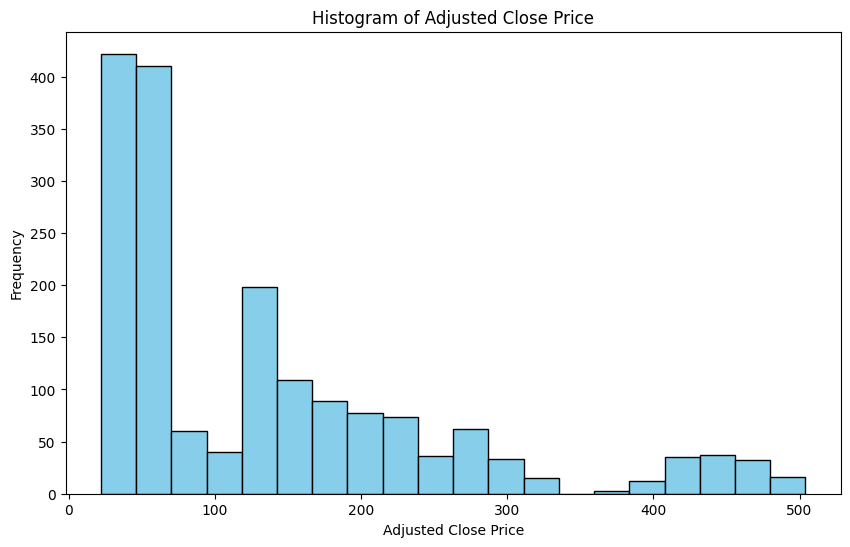

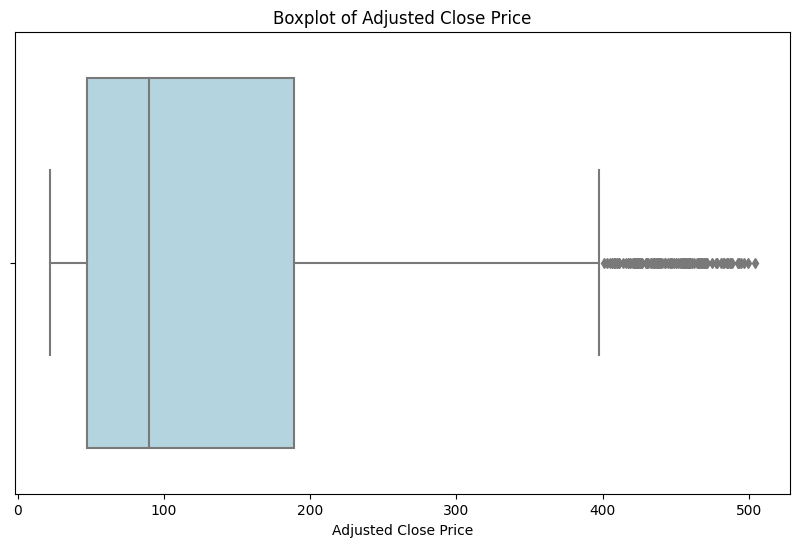

In [30]:
# Import necessary plotting libraries for data visualization.
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for enhanced data visualization

# Plotting Histogram
plt.figure(figsize=(10, 6))
plt.hist(stock_data['Adj Close'], bins=20, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Adjusted Close Price')
plt.ylabel('Frequency')
plt.title('Histogram of Adjusted Close Price')
plt.show()
# This histogram visualizes the distribution of the 'Adj Close' prices, providing insights into the central tendency and spread of the data.

# Plotting Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=stock_data['Adj Close'], color='lightblue')
plt.xlabel('Adjusted Close Price')
plt.title('Boxplot of Adjusted Close Price')
plt.show()
# The boxplot displays the summary statistics of the 'Adj Close' prices, highlighting key metrics such as median, quartiles, and potential outliers.


<ipython-input-31-9157fdd9ec4d>:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,i+1)
<ipython-input-31-9157fdd9ec4d>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(stock_data[col])
<ipython-input-31-9157fdd9ec4d>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to 

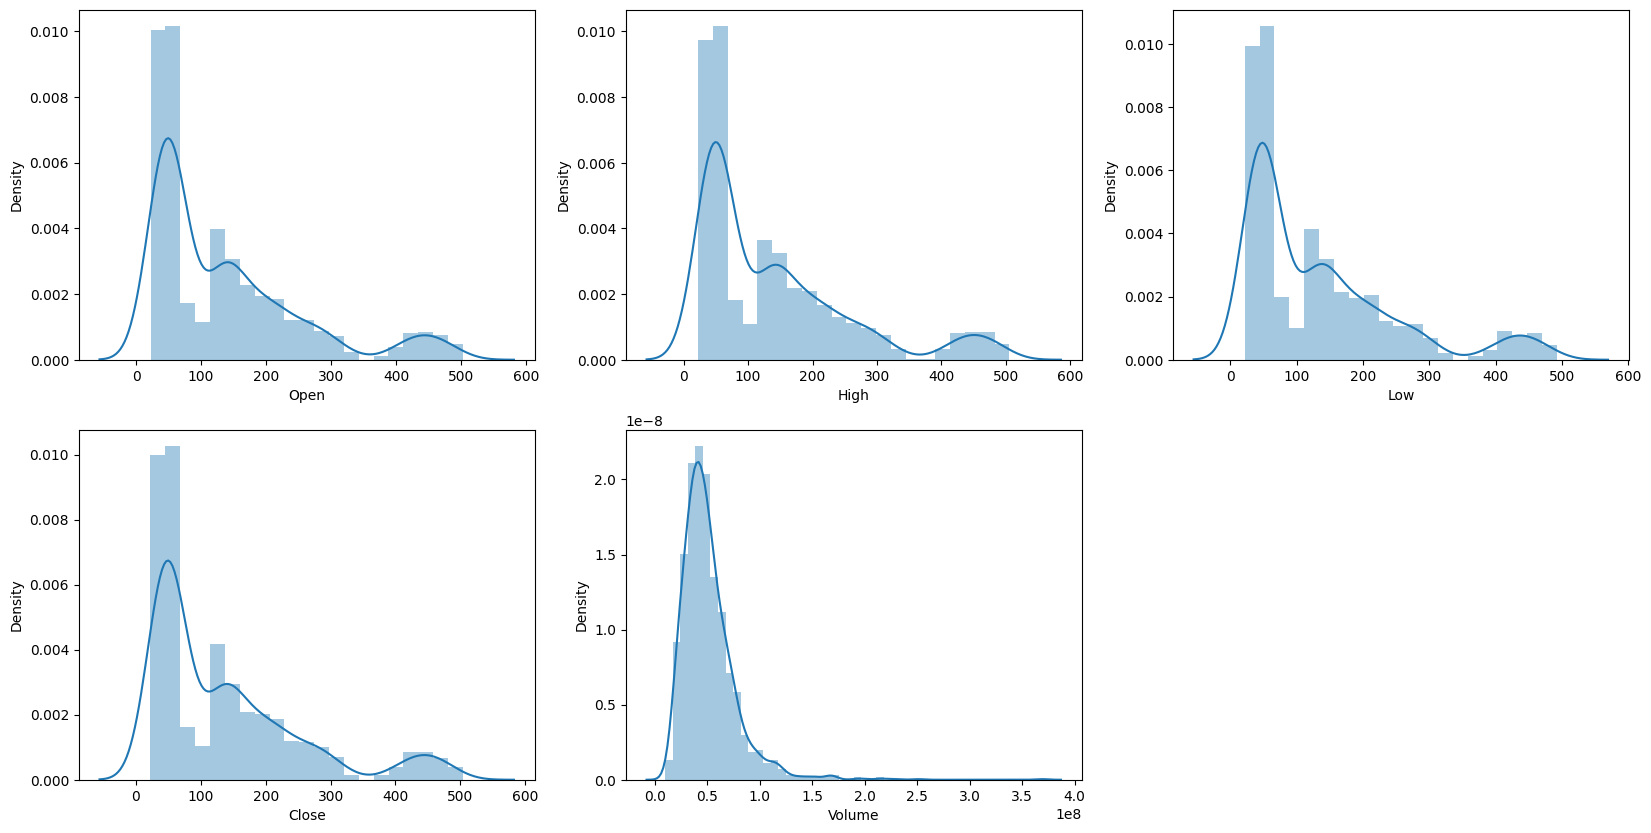

In [31]:
# Import seaborn for enhanced data visualization.
import seaborn as sb

# Specify the features to visualize.
features = ['Open', 'High', 'Low', 'Close', 'Volume']

# Create subplots for each feature, displaying their distributions.
plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sb.distplot(stock_data[col])
plt.show()
# These subplots showcase the distribution of selected features ('Open', 'High', 'Low', 'Close', 'Volume') using kernel density estimation (KDE) plots.


Learningf from the histograms:

- All are right skewed
- Right-skewed distributions are often observed in financial data, where losses may be limited (left side) but gains can be substantial (right side).
- In many real-world scenarios, data with a natural lower limit and the potential for positive growth can result in a right-skewed distribution.



<ipython-input-32-291a5ab54c98>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,i+1)


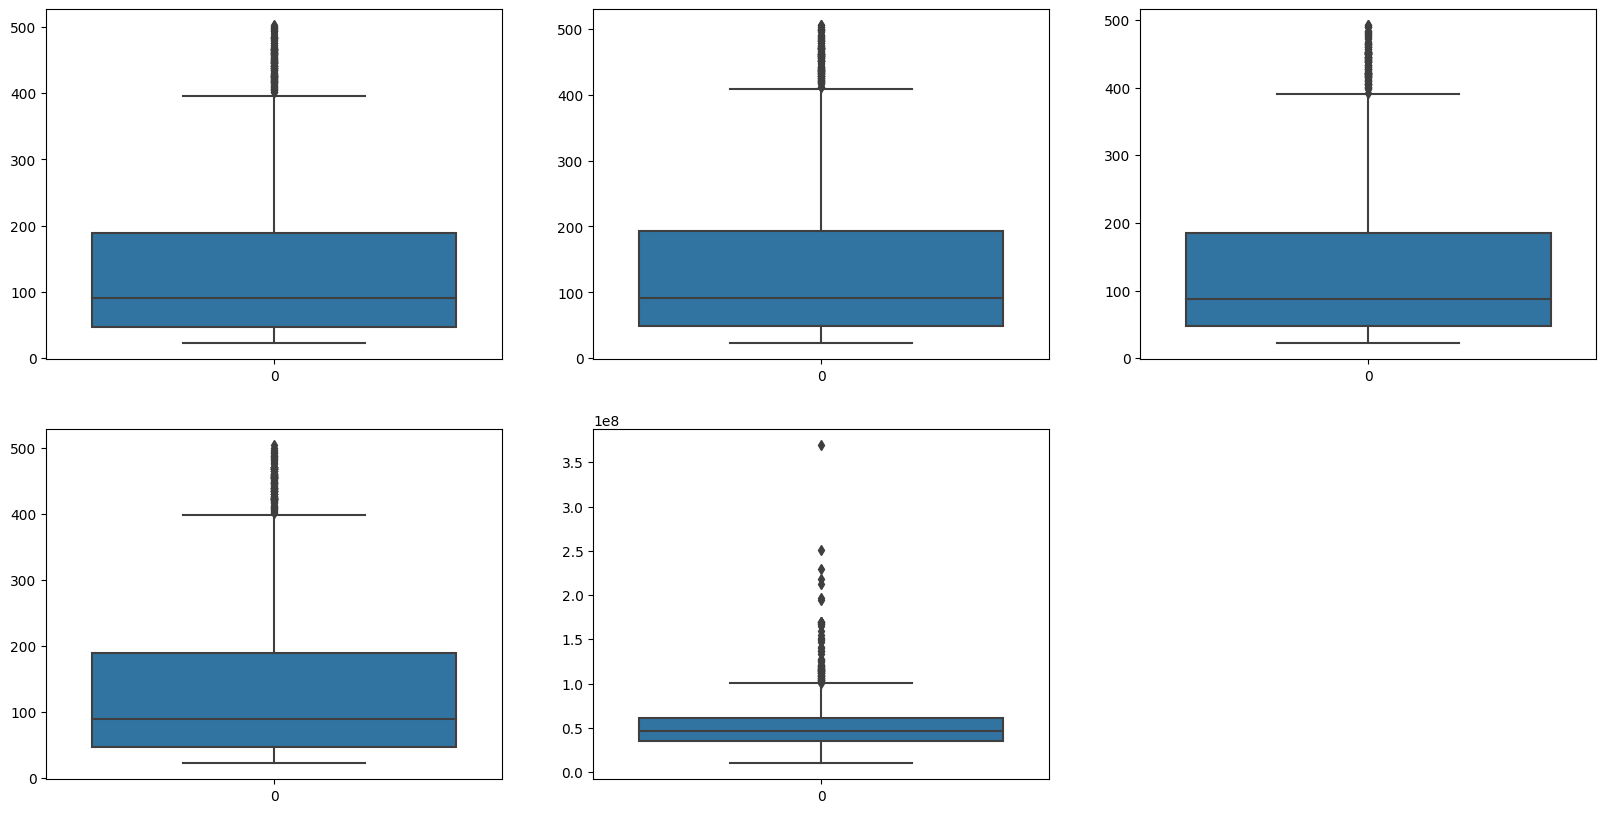

In [32]:
# Create subplots for each feature, displaying their boxplots.
plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sb.boxplot(stock_data[col])
plt.show()

Learnings from the boxplots:

- Most of the data is in between 50 and 200
- The data has somne outliers on the right hand side, which explains the right skewness.
- Minimum and maximums are apart with 500 dollars, which for a stock is pretty good.

In [33]:
# Assuming data is your DataFrame
date_column = stock_data['Date']
adj_close_column = stock_data['Adj Close']

# Minimum
min_date = date_column.min()
min_close = adj_close_column.min()

# Maximum date
max_date = date_column.max()
max_close = adj_close_column.max()

# Print minimum and maximum values for Date and Adjusted Close Price
print(f"Minimum Date: {min_date}")
print(f"Maximum Date: {max_date}")

print(f"Minimum Close: {min_close}")
print(f"Maximum Close: {max_close}")
# These statements print the minimum and maximum values for the 'Date' and 'Adj Close' columns, providing insights into the temporal and price range of the dataset.

Minimum Date: 2016-12-08 00:00:00
Maximum Date: 2023-12-06 00:00:00
Minimum Close: 22.075685501098633
Maximum Close: 504.0456848144531


## Bivariate Analysis

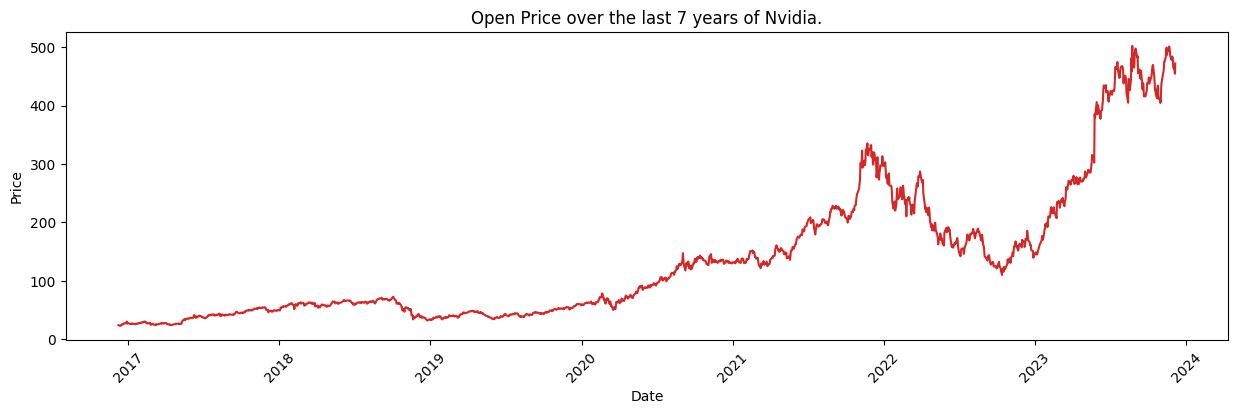

In [34]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Price', dpi=100):
    """
    Plot a DataFrame with specified x and y columns.

    Parameters:
        df (DataFrame): The input DataFrame.
        x (Series): The data for the x-axis.
        y (Series): The data for the y-axis.
        title (str): The title of the plot.
        xlabel (str): The label for the x-axis.
        ylabel (str): The label for the y-axis.
        dpi (int): Dots per inch for the plot resolution.
    """
    plt.figure(figsize=(15, 4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.xticks(rotation=45)
    plt.show()

# Example usage:
plot_df(stock_data, x=stock_data['Date'], y=stock_data['Open'], title='Open Price over the last 7 years of Nvidia.')
# This function is designed to plot a DataFrame with specified x and y columns, providing a convenient way to visualize time series data.


The graph illustrates a discernible upward trend in Nvidia's stock prices leading up to the conclusion of the COVID-19 pandemic.

Following a subsequent dip likely associated with pandemic-related market fluctuations, the stock exhibited a resumption of upward momentum, and this positive trend has persisted up to the present time.

The rise in stock prices indicates a recovery and ongoing growth in Nvidia's market value, potentially reflecting improved business performance or investor confidence in the company's prospects.



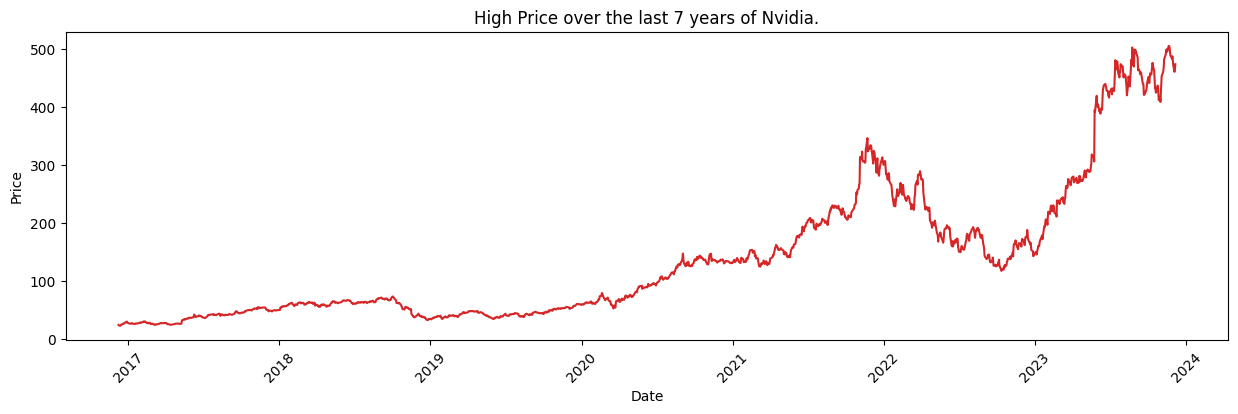

In [35]:
plot_df(stock_data, x=stock_data['Date'], y=stock_data['High'], title='High Price over the last 7 years of Nvidia.')


*See Open Price over the last 7 years of Nvidia explanation.*

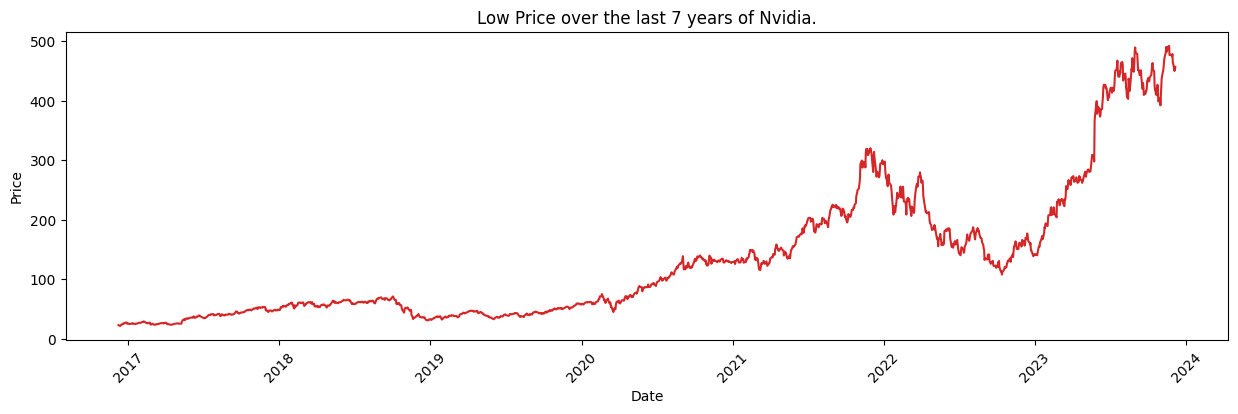

In [36]:
plot_df(stock_data, x=stock_data['Date'], y=stock_data['Low'], title='Low Price over the last 7 years of Nvidia.')


*See Open Price over the last 7 years of Nvidia explanation.*

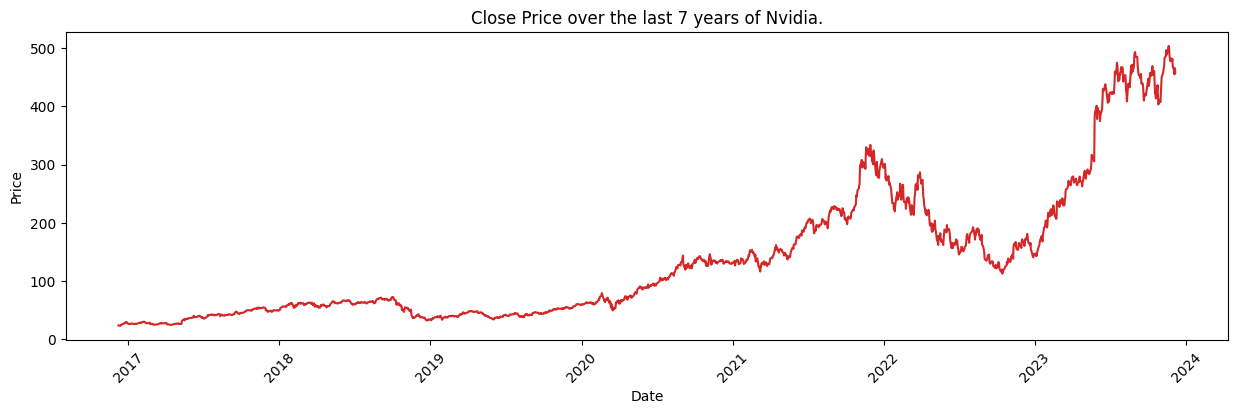

In [37]:
plot_df(stock_data, x=stock_data['Date'], y=stock_data['Close'], title='Close Price over the last 7 years of Nvidia.')


*See Open Price over the last 7 years of Nvidia explanation.*

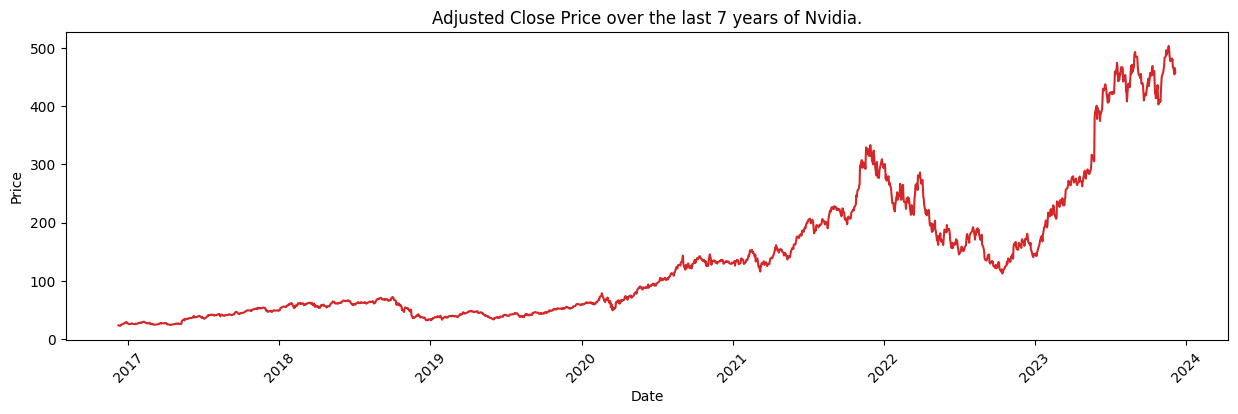

In [38]:
plot_df(stock_data, x=stock_data['Date'], y=stock_data['Adj Close'], title='Adjusted Close Price over the last 7 years of Nvidia.')


*See Open Price over the last 7 years of Nvidia explanation.*

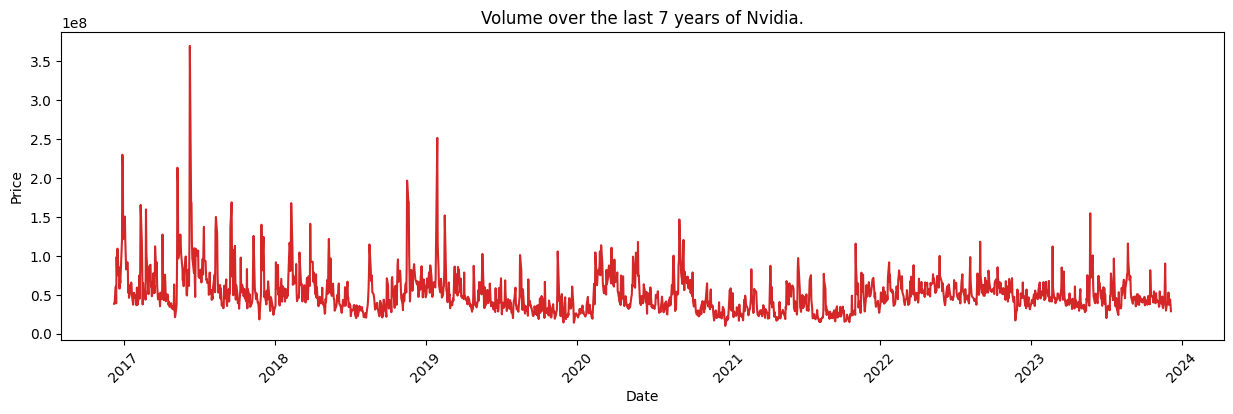

In [39]:
plot_df(stock_data, x=stock_data['Date'], y=stock_data['Volume'], title='Volume over the last 7 years of Nvidia.')


We observe that the peak trading activity occurred between 2017 and 2019. Subsequently, due to the impact of the COVID-19 pandemic and the simultaneous increase in stock prices, the purchasing power decreased, leading to reduced investments in Nvidia stocks.

### Trend Analysis NVIDEA

- Upward trend.

- For a tech company, is this good or bad?

> Good. They have more clients and thus more sales.

- What could be a reason for this price increase?

> With more and more people buying graphics cards, either for gaming or mining crypto, these cards become more expensive.
> When you look closely at the stock prices, they follow the bitcoin trend rather closely. Because these cards are generally used a lot to mine bitcoin or other cryptocurrencies.

## Interesting Detail: COVID

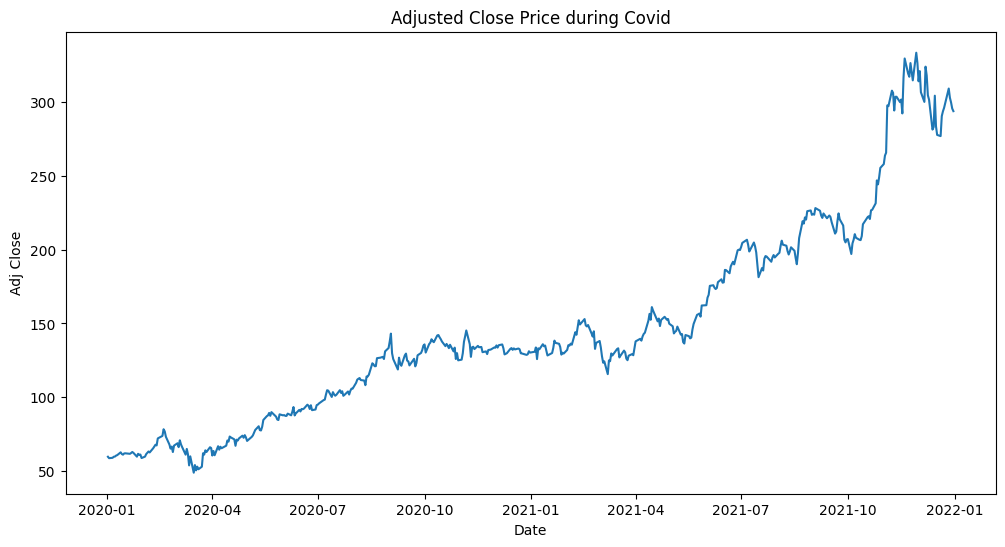

In [40]:
# Subset the stock_data DataFrame for the time range between '2020-01-01' and '2022-01-01'.
subset_stock = stock_data[(stock_data['Date'] >= '2020-01-01 00:00:00') & (stock_data['Date'] <= '2022-01-01 00:00:00')]

# Visualize the subset time series using a line plot.
plt.figure(figsize=(12, 6))
sns.lineplot(data=subset_stock, x='Date', y='Adj Close')
plt.title('Adjusted Close Price during Covid')
plt.show()

###Trend Analysis Nvidia COVID

- Upward trend.

- For a tech company, is this good or bad?

> Good. They have more clients and thus more sales.

- What could be a reason for this price increase?

> During COVID, a lot of companies took a hit. However, this is not the case for NVIDIA since they sell technology that can be used at home. With more people staying at home, and the world turning digital, NVIDIA skyrocketed. People stayed home and had to buy new laptops, people gamed more because of the free time, people started mining Cryptocurrencies.

## Multivariate Analysis

<ipython-input-41-494ab3a99cff>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = stock_data.corr()


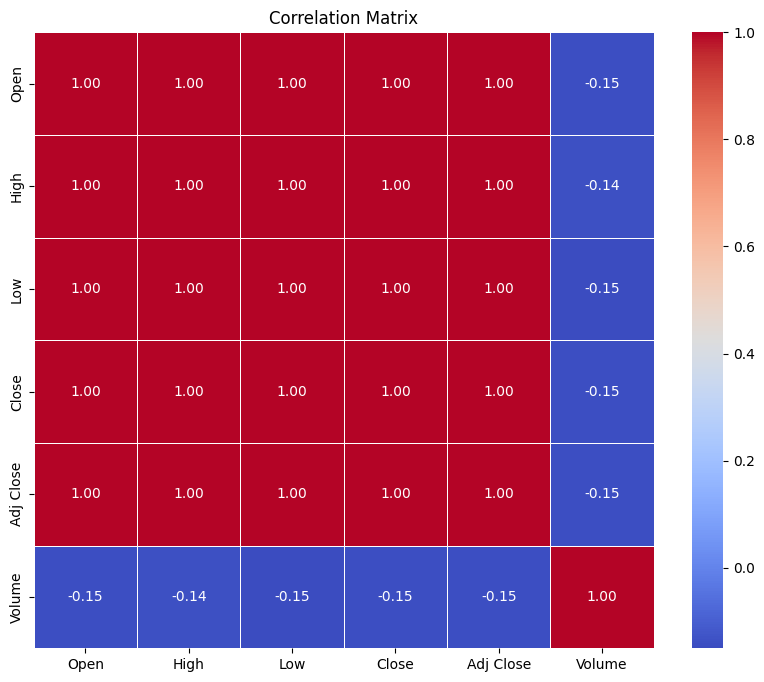

In [41]:
correlation_matrix = stock_data.corr()

# Create a heatmap for visualization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

**Strongly Positively Correlated Pair**:

- Pair: Open and High
- Correlation Coefficient: 0.999703
- The correlation coefficient close to 1 indicates a very strong positive correlation between the opening price (Open) and the highest price (High). This is expected as the highest price during a trading period is likely to be close to the opening price.

**Negatively Correlated Pair**:

- Pair: Low and Volume
- Correlation Coefficient: -0.149545
- There is a small negative correlation between the lowest price (Low) and the trading volume (Volume). This could be due to the fact that, during periods of low prices, there might be higher interest from traders or investors, leading to increased trading activity.

**Ambiguous Correlation Pair**:

- Pair: Close and Volume
- Correlation Coefficient: -0.144466
- The correlation coefficient is moderately negative, but not strongly so. This ambiguous correlation between the closing price (Close) and the trading volume (Volume) could be influenced by various factors. It might indicate that there are instances where increased trading volume is associated with a slight decrease in closing prices, but the relationship is not consistently strong.

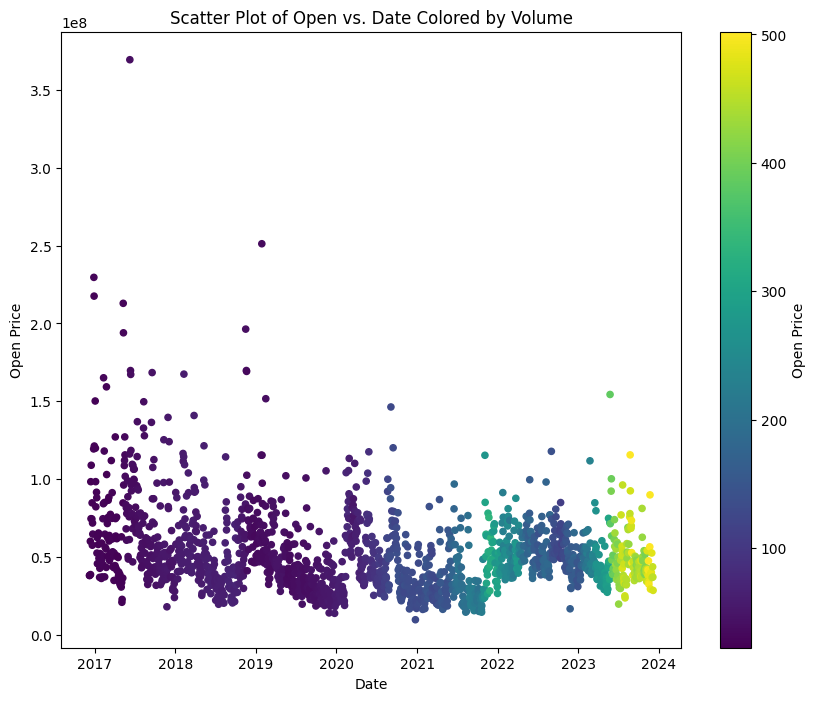

In [42]:
# Scatter plot of Open vs. High Prices colored by Low Prices
plt.figure(figsize=(10, 8))

scatter = plt.scatter(stock_data['Date'], stock_data['Volume'], c=stock_data['Open'], cmap='viridis', s=20)

plt.colorbar(scatter, label='Open Price')
plt.ylabel('Open Price')
plt.xlabel('Date')
plt.title('Scatter Plot of Open vs. Date Colored by Volume')
plt.show()

- **Scatter Plot**: Each data point on the plot represents a specific date. The x-axis ('Date') represents time, and the y-axis ('Volume') represents the trading volume on each corresponding date.

- **Color Representation**: The color of each data point is determined by the 'Open' price on that date. The color map used is 'viridis', where higher 'Open' prices are represented by lighter colors, and lower prices are represented by darker colors.

Lighter-colored points indicate days with higher opening prices, while darker points represent days with lower opening prices. Thus, we can conclude that this stock has been fluctuating around 2023 when it was trending upwards.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.9 MB/s eta 0:00:00


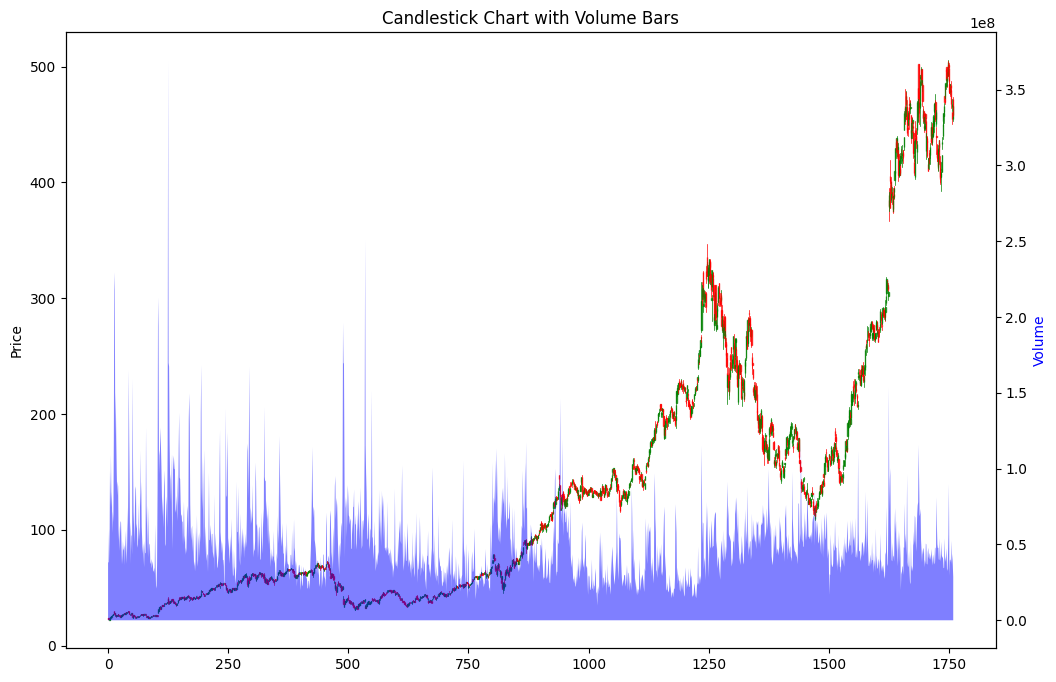

In [43]:
!pip install mplfinance

from mplfinance.original_flavor import candlestick_ohlc

# Create a new DataFrame for Candlestick Chart
ohlc_data = stock_data[['Open', 'High', 'Low', 'Close']].reset_index()

# Plotting Candlestick Chart with Volume Bars
fig, ax1 = plt.subplots(figsize=(12, 8))

candlestick_ohlc(ax1, ohlc_data.values, width=0.6, colorup='g', colordown='r', alpha=0.75)
ax1.set_ylabel('Price')

ax2 = ax1.twinx()
ax2.fill_between(stock_data.index, 0, stock_data['Volume'], facecolor='blue', alpha=0.5)
ax2.set_ylabel('Volume', color='blue')

plt.title('Candlestick Chart with Volume Bars')
plt.show()

This is a visual representation of stock price movements with candlesticks (showing Open, High, Low, and Close prices) and overlays it with volume bars to provide additional insights into trading activity. Green candlesticks indicate bullish (upward) price movements, red candlesticks indicate bearish (downward) price movements, and the blue bars represent trading volume.

In this graph, we can see that the volume of trades goes relatively down while the price rises.

# Model Building

Choose an appropriate time series forecasting model. You can select from methods like ARIMA and/or Exponential Smoothing.

        Date       Open       High        Low      Close  Adj Close    Volume
0 2016-12-08  23.797501  24.155001  23.262501  23.370001  23.034212  38154400
1 2016-12-09  23.549999  23.567499  22.677500  22.955000  22.625170  38231200
2 2016-12-12  22.462500  22.487499  21.885000  22.397499  22.075686  60133200
3 2016-12-13  22.522499  23.072500  22.512501  22.792500  22.465002  38779600
4 2016-12-14  23.135000  24.277500  22.892500  24.112499  23.766043  98398000


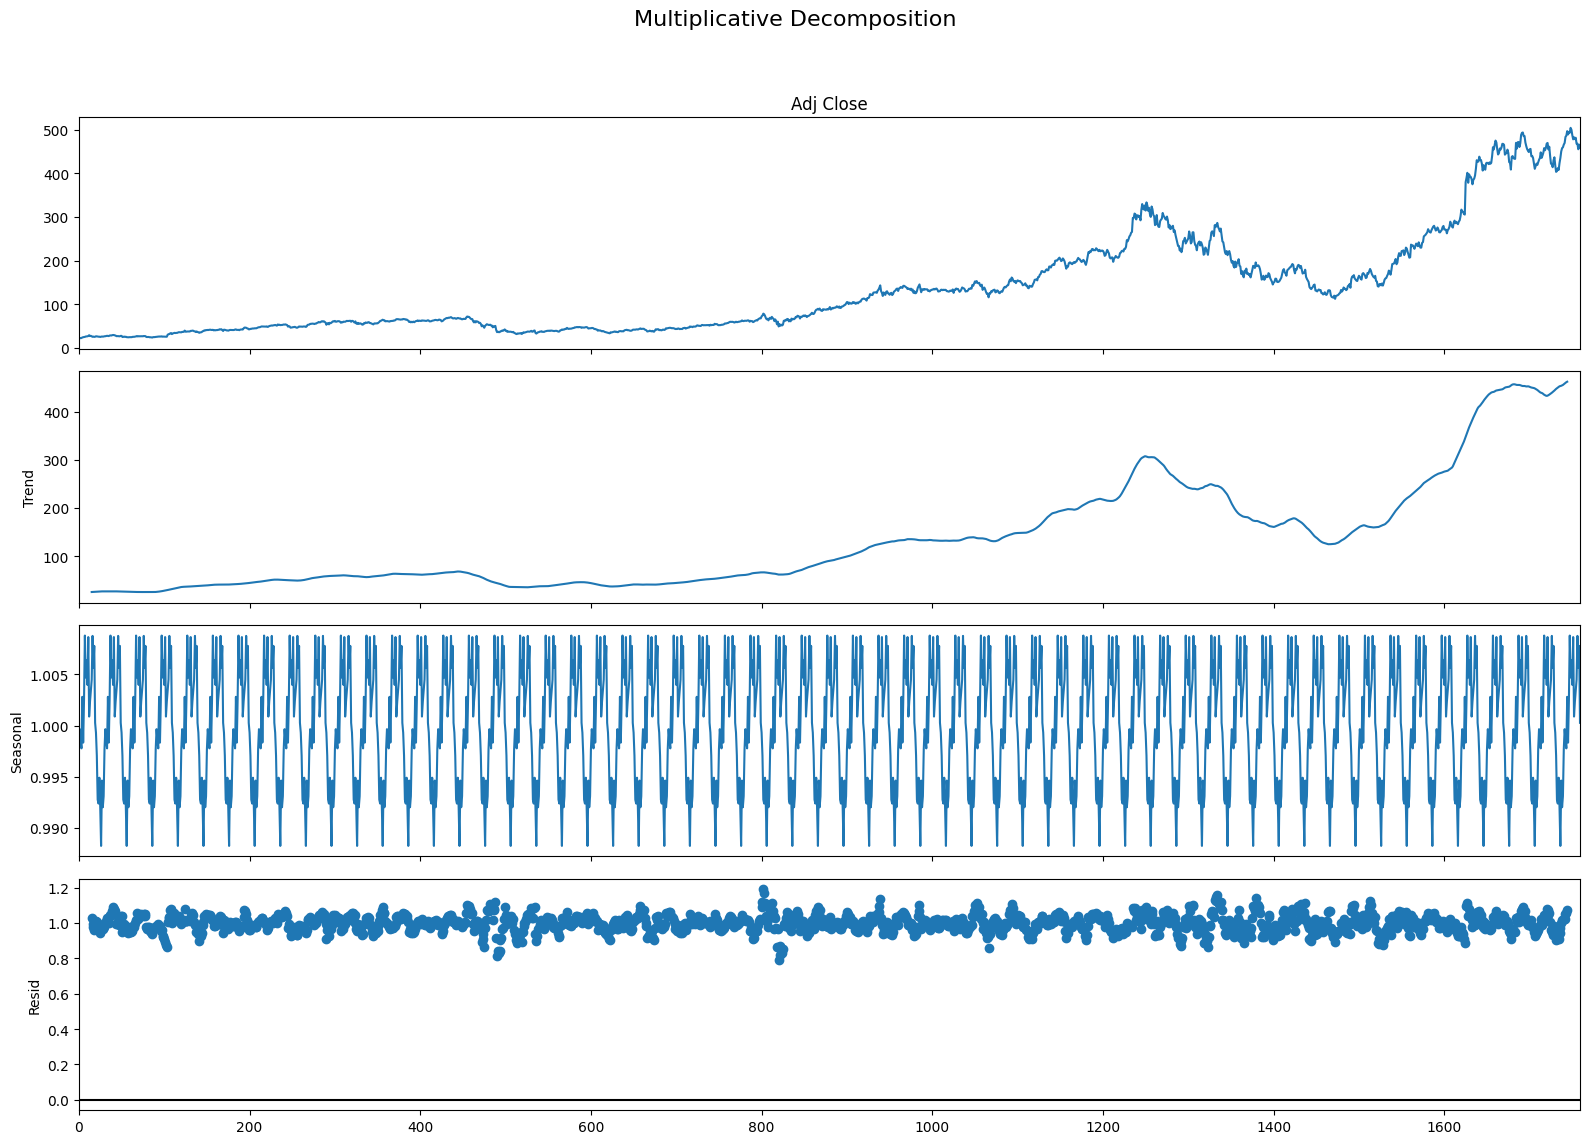

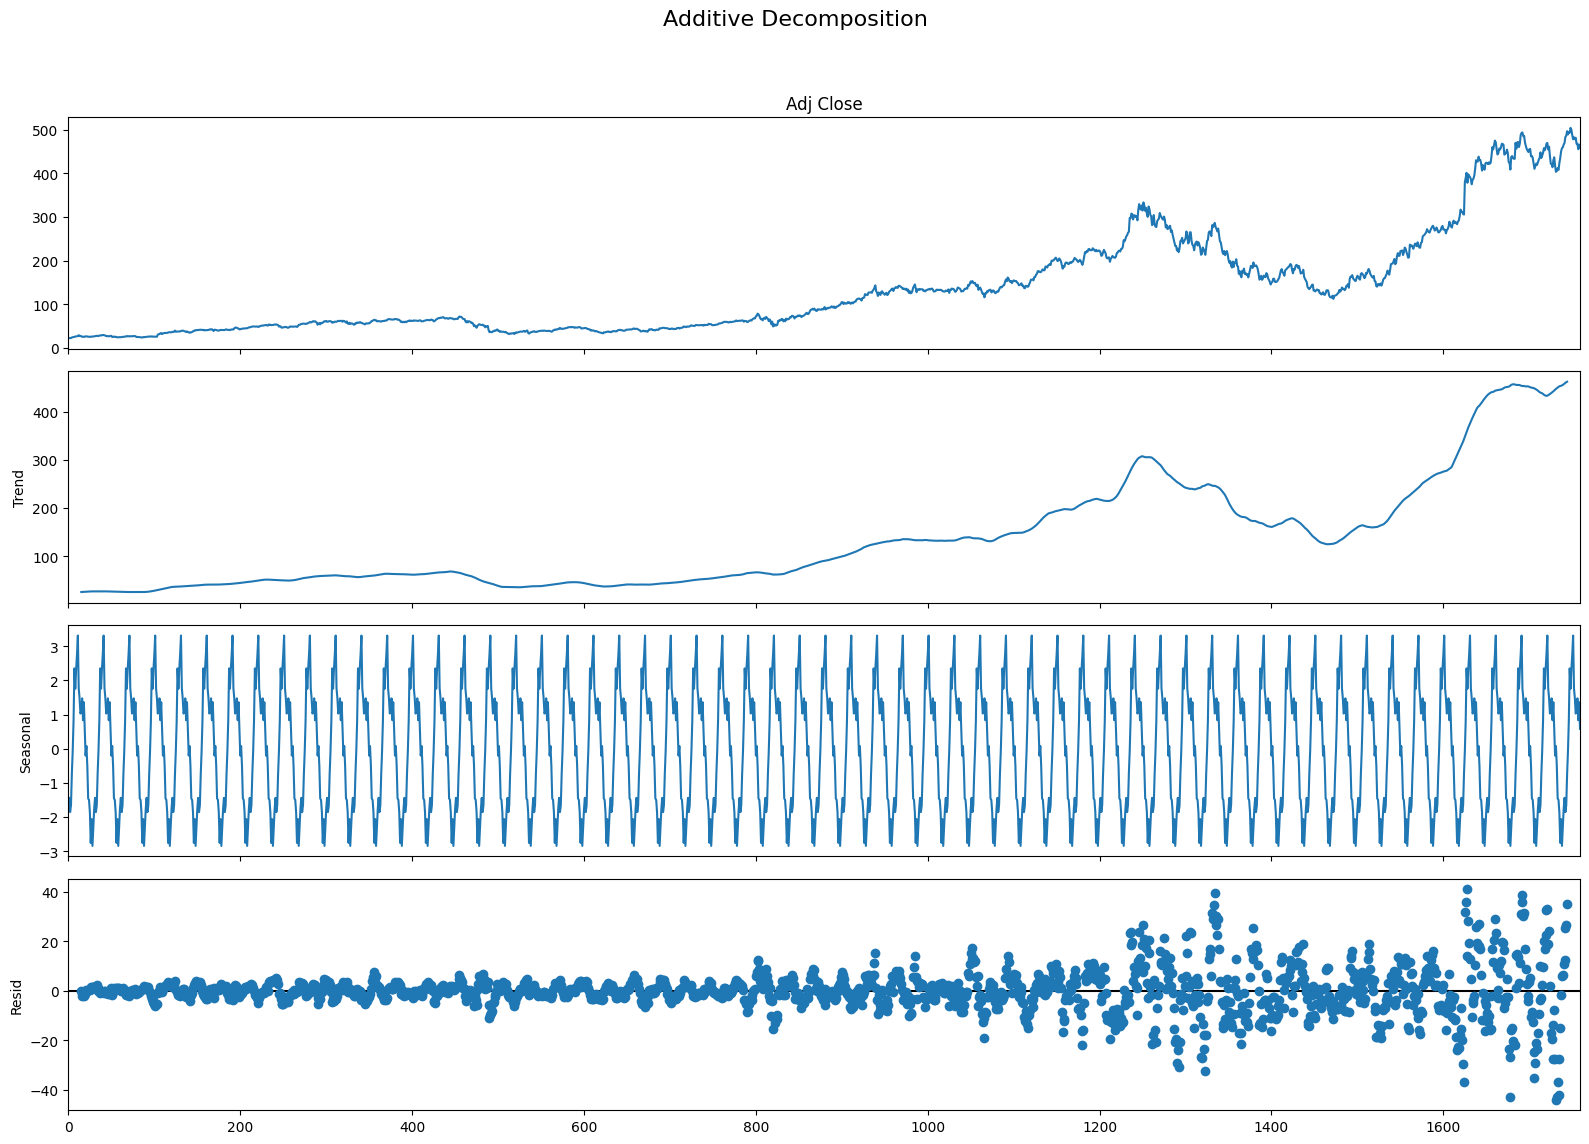

In [44]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

#stock_data = stock_data[stock_data['Date']>= '2022-01-01']

df_adj_close = stock_data['Adj Close']


# Display the first few rows of the stock_data DataFrame.
print(stock_data.head())

# Multiplicative Decomposition
multiplicative_decomposition = seasonal_decompose(df_adj_close, model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(df_adj_close, model='additive', period=30)

# Plot the multiplicative decomposition
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Plot the additive decomposition
additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

- Looking at the two different decompositions, we can see that their is still a pattern visible in the residuals of the additive decomposition. This indicates that there might be a better way to decompose.

- The multiplicative decomposition, looks quite random which is good. So ideally, multiplicative decomposition should be preferred for this particular series.

## ARIMA Model

### Finding the D Parameter

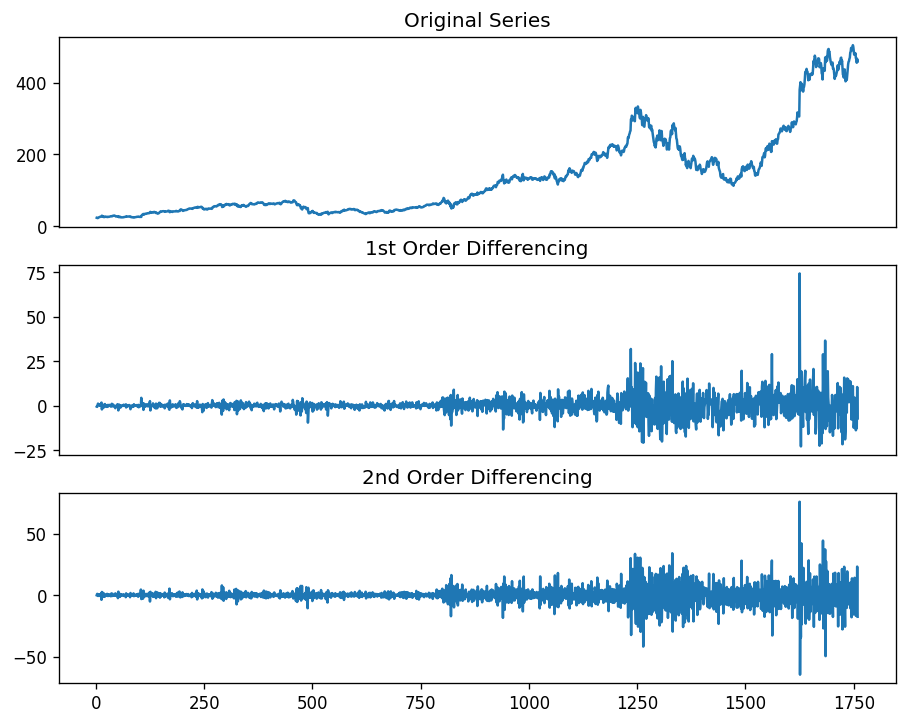

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set plot configurations
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(df_adj_close)
ax1.set_title('Original Series')
ax1.axes.xaxis.set_visible(False)

# 1st Differencing
ax2.plot(df_adj_close.diff())
ax2.set_title('1st Order Differencing')
ax2.axes.xaxis.set_visible(False)

# 2nd Differencing
ax3.plot(df_adj_close.diff().diff())
ax3.set_title('2nd Order Differencing')

plt.show()

In observing the time series, it's evident that applying first-order differencing contributes to making the series stationary. Notably, in the initial differencing step, the data exhibits fewer fluctuations. However, after the first order, there is a noticeable escalation in noise. Consequently, opting for first-order differencing appears suitable for our modeling purposes. To further validate this choice, an autocorrelation plot can be employed.

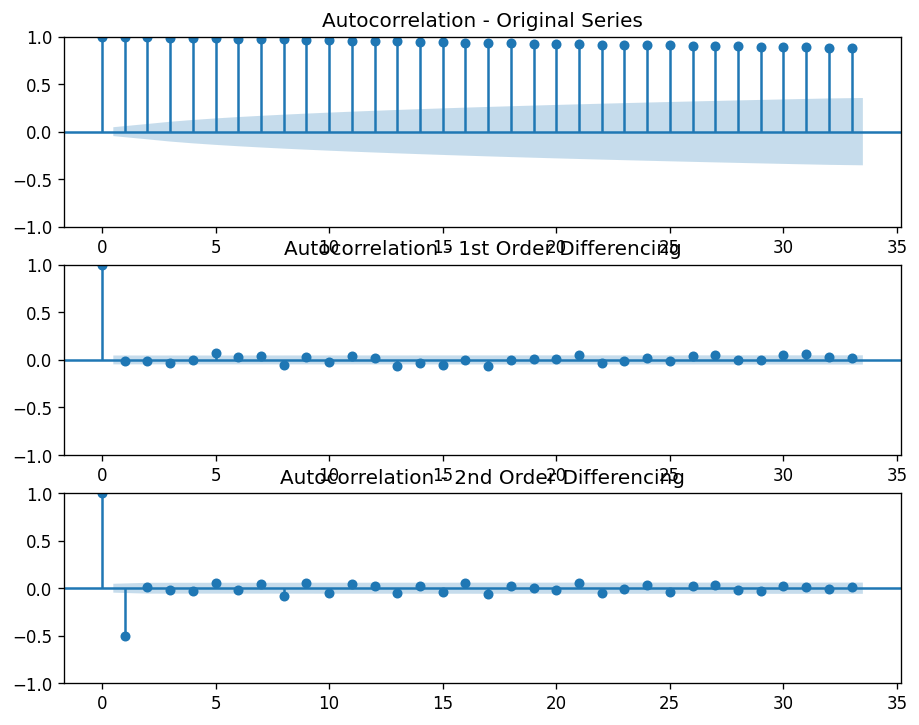

In [46]:
from statsmodels.graphics.tsaplots import plot_acf

# Create subplots for autocorrelation plots
fig, (ax1, ax2, ax3) = plt.subplots(3)

# Autocorrelation plot for the original series
plot_acf(df_adj_close, ax=ax1)
ax1.set_title('Autocorrelation - Original Series')

# Autocorrelation plot for the 1st order differencing
plot_acf(df_adj_close.diff().dropna(), ax=ax2)
ax2.set_title('Autocorrelation - 1st Order Differencing')

# Autocorrelation plot for the 2nd order differencing
plot_acf(df_adj_close.diff().diff().dropna(), ax=ax3)
ax3.set_title('Autocorrelation - 2nd Order Differencing')

plt.show()

In second-order differencing, we observe a shift towards the negative side in the immediate lag, indicating an excessive level of differencing in the series at this stage.







### Finding the P value parameter

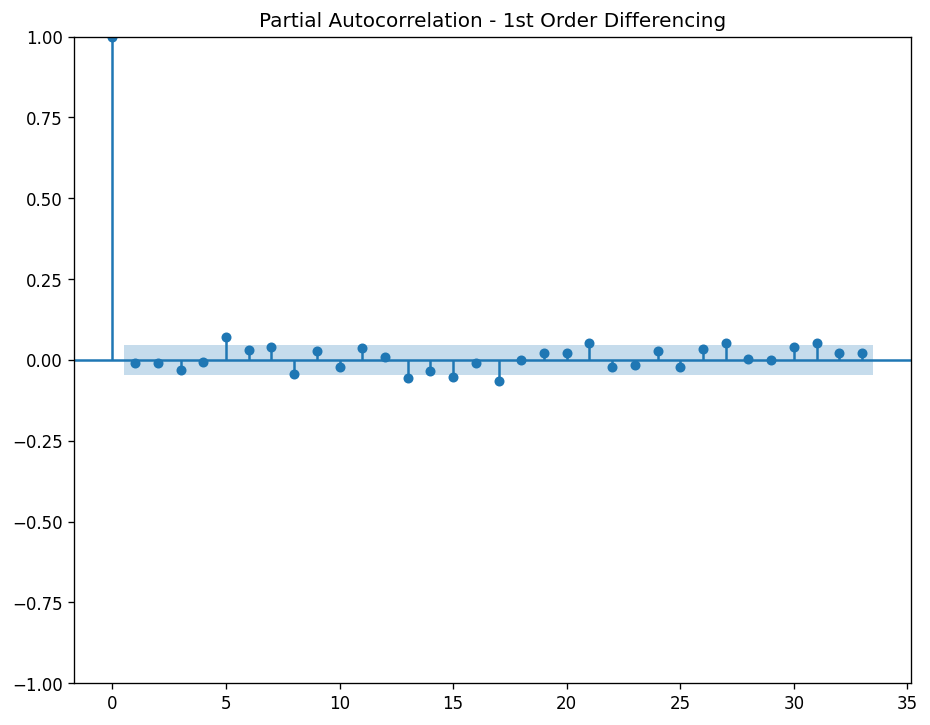

In [47]:
from statsmodels.graphics.tsaplots import plot_pacf

# Plot partial autocorrelation for the 1st order differencing
plot_pacf(df_adj_close.diff().dropna())
plt.title('Partial Autocorrelation - 1st Order Differencing')
plt.show()

After plotting this, we can see that the 1st lag is definitely out of the limit. We cannot say the same about the second or third one so we will be using 1 as the P value.

### Finding the Q value parameter



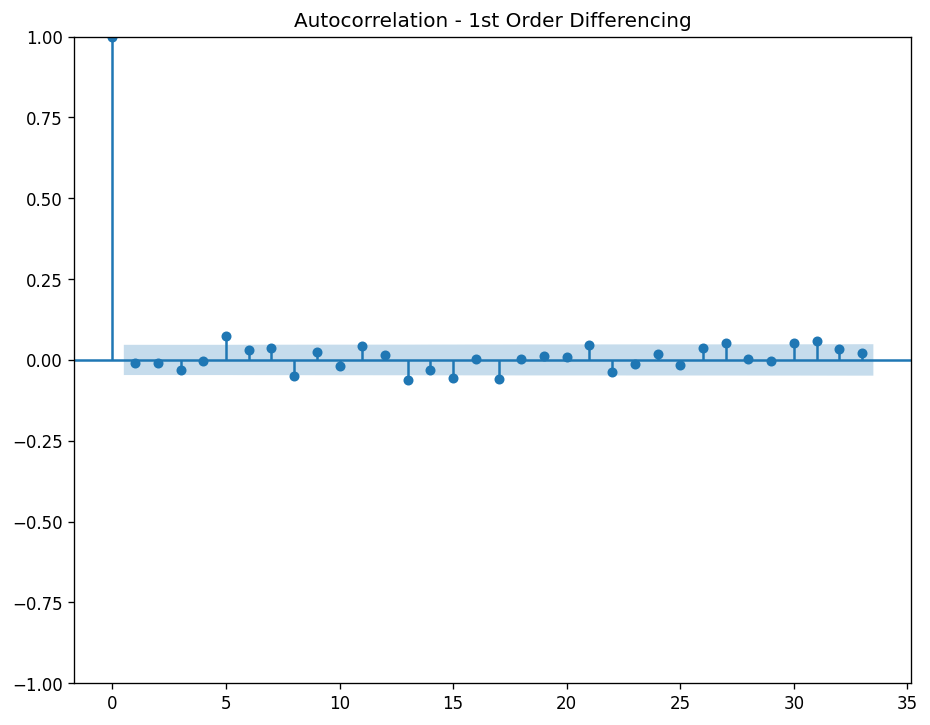

In [48]:
from statsmodels.graphics.tsaplots import plot_acf

# Autocorrelation plot for the 1st order differencing
plot_acf(df_adj_close.diff().dropna())
plt.title('Autocorrelation - 1st Order Differencing')
plt.show()

Similar to the partial differentiation, we can see that only the first lag is outside of the limit and that is why we will also choose value 1 for Q.

## Building the ARIMA Models

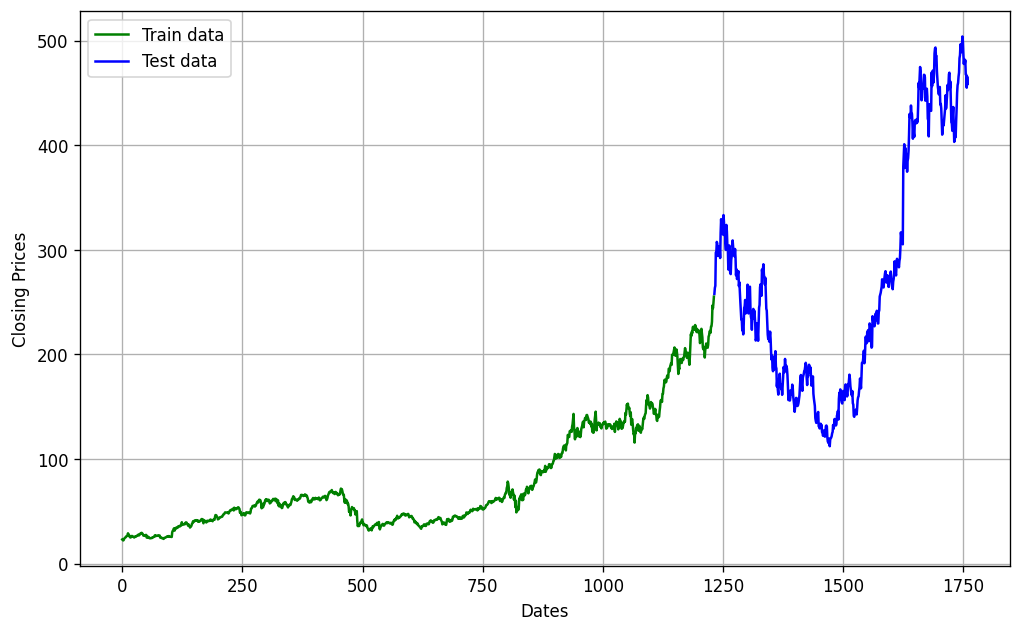

In [49]:
# Train-test split
train, test = df_adj_close[:int(len(df_adj_close)*0.7)], df_adj_close[int(len(df_adj_close)*0.7):]

# Plotting the train-test split
plt.figure(figsize=(10,6))  # Set the figure size for better visibility
plt.grid(True)  # Add a grid to the plot for better readability
plt.xlabel('Dates')  # Label the x-axis as 'Dates'
plt.ylabel('Closing Prices')  # Label the y-axis as 'Closing Prices'
plt.plot(train, 'green', label='Train data')  # Plot the training data in green
plt.plot(test, 'blue', label='Test data')  # Plot the testing data in blue
plt.legend()  # Display the legend to differentiate between train and test data


- **Balancing Training and Testing**: The 70/30 distribution strikes a balance between allocating sufficient data (70%) for training the time series model and reserving a separate portion (30%) for testing its predictive performance.

- **Learning Patterns and Trends**: With 70% of the data dedicated to training, the model can effectively learn and capture patterns, trends, and relationships inherent in the time series, improving its ability to make accurate predictions while avoiding overfitting.



Root Mean Squared Error (RMSE): 114.64493400419884


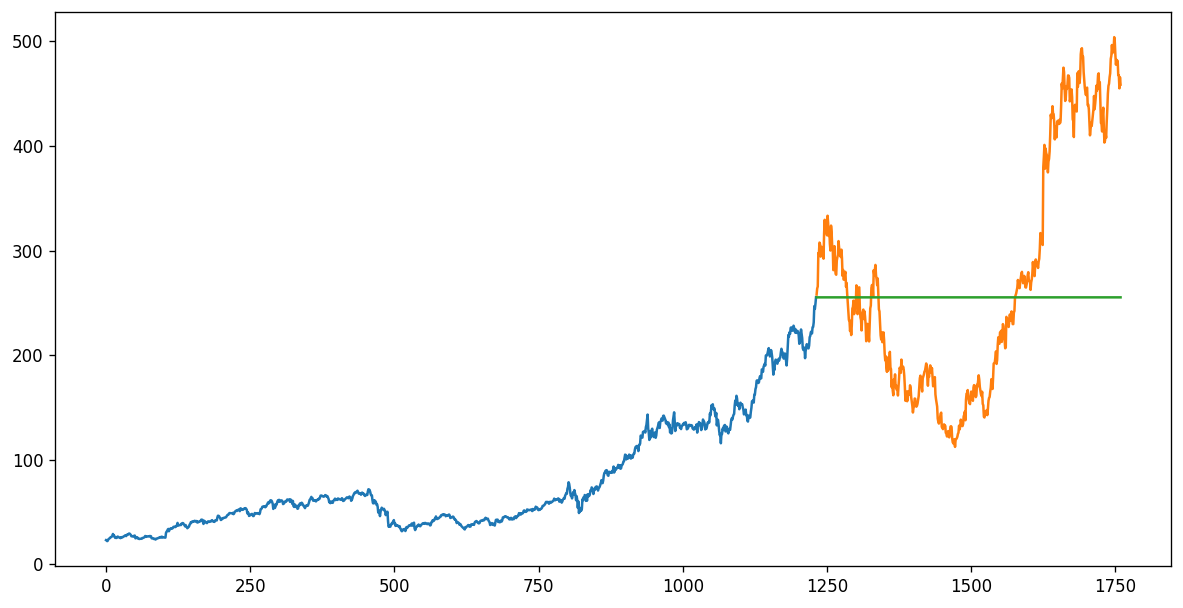

In [50]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# Build and train an ARIMA model
order = (1, 1, 1)  # Adjust order based on data characteristics
model1 = ARIMA(train, order=order)
fit_model1 = model1.fit()

# Make predictions
predictions = fit_model1.forecast(steps=len(test))

# Evaluate the model
rmse = sqrt(mean_squared_error(test, predictions))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Visualize predictions
plt.figure(figsize=(12, 6))
plt.plot(train, label='Train')
plt.plot(test,  label='Test')
plt.plot(predictions, label='Prediction')
plt.show()

We can see a straight horizontal line as our predicted variables, which indicates a bad model and that the data is too complex to handle.

In [51]:
fit_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Adj Close   No. Observations:                 1232
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2848.936
Date:                Wed, 06 Dec 2023   AIC                           5703.872
Time:                        19:58:15   BIC                           5719.219
Sample:                             0   HQIC                          5709.646
                               - 1232                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4886      0.240     -2.036      0.042      -0.959      -0.018
ma.L1          0.4365      0.245      1.780      0.075      -0.044       0.917
sigma2         5.9941      0.125     47.879      0.000       5.749       6.239
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              1594.00
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):              11.61   Skew:                             0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**Dependent Variable**:
The dependent variable is "Adj Close," indicating that the model is predicting or analyzing the adjusted closing prices of a financial instrument.

**Model Information**:

The model is specified as SARIMAX with an ARIMA(1, 1, 1) structure, which means it includes autoregressive (AR) and moving average (MA) terms with a seasonal component and first-order differencing.

**Number of Observations**:

There are 1,232 observations in the dataset.

**Log Likelihood**:

The log likelihood value is -2843.645. This value is part of the optimization process, and higher log likelihood values indicate a better fit.

**Model Coefficients**:

The coefficients of the ARIMA(1, 1, 1) model are provided:
ar.L1: -0.5035 with a standard error of 0.228.
ma.L1: 0.4497 with a standard error of 0.233.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Root Mean Squared Error (RMSE): 114.25778105253453


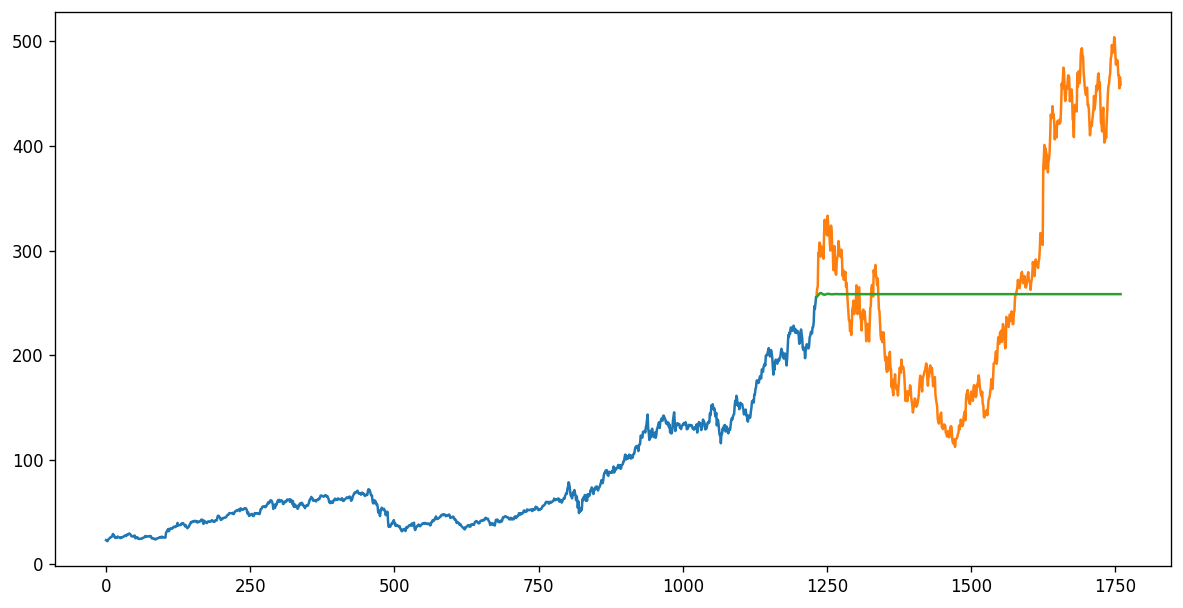

In [52]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# Build and train an ARIMA model
order = (5, 1, 3)  # Adjust order based on data characteristics
model2 = ARIMA(train, order=order)
fit_model2 = model2.fit()

# Make predictions
predictions2 = fit_model2.forecast(steps=len(test))

# Evaluate the model
rmse2 = sqrt(mean_squared_error(test, predictions2))
print(f'Root Mean Squared Error (RMSE): {rmse2}')

# Visualize predictions
plt.figure(figsize=(12, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(predictions2, label='Prediction')
plt.show()

Right here, we see the same output as the first model, except for the little movement we see in the beginning of our predictions. We can see that it predicts off the straight line but all in all reverts back to the horizontal line.
- This is because of the lags used. If only 5 lags used in the model, the last 5 lags are used to create a prediction. When those are all following a horizontal line, they all use the same input and will obviously predict the same value.


# Model Evaluation

Mean Absolute Error (MAE): 93.61140576470146
Mean Squared Error (MSE): 13143.460892827108
R-squared: -0.01964484211600026


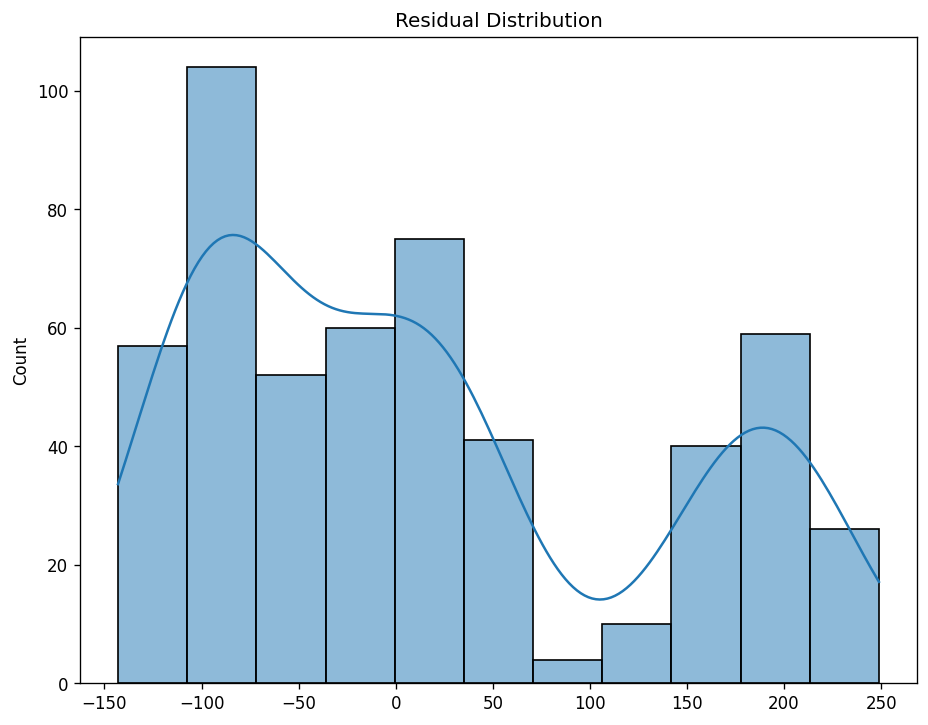

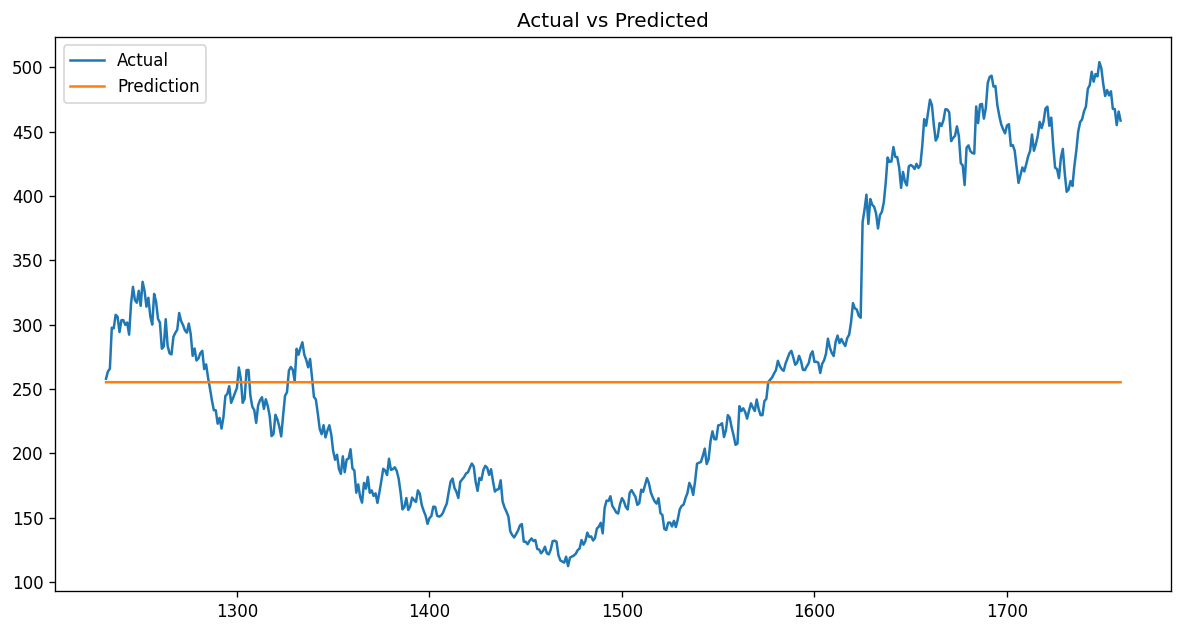

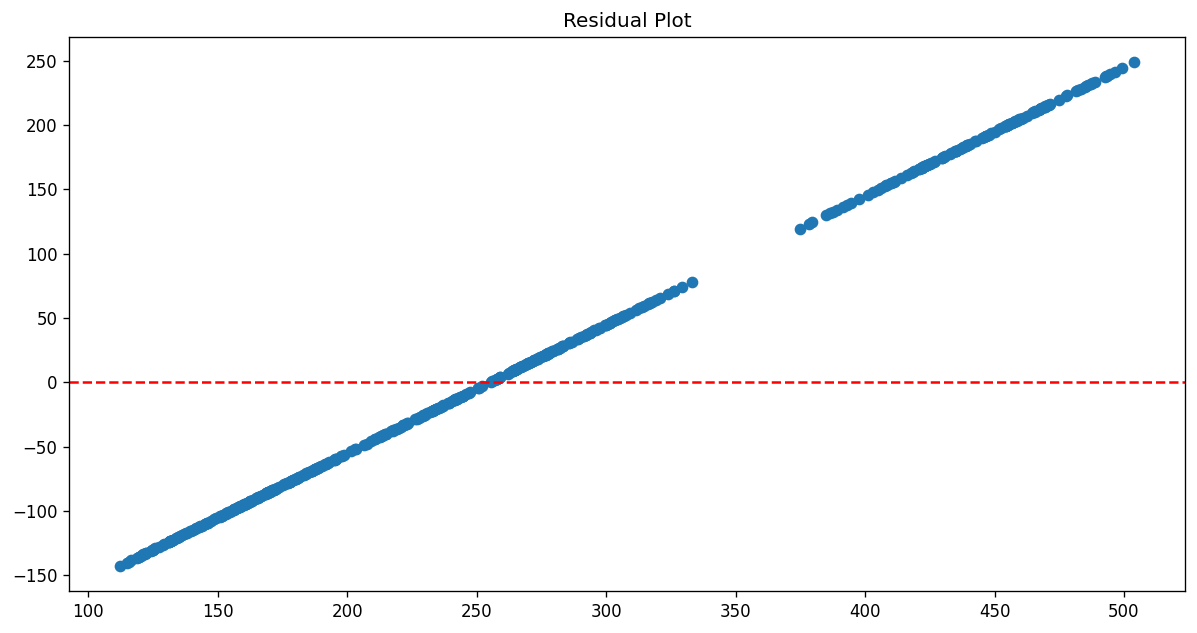

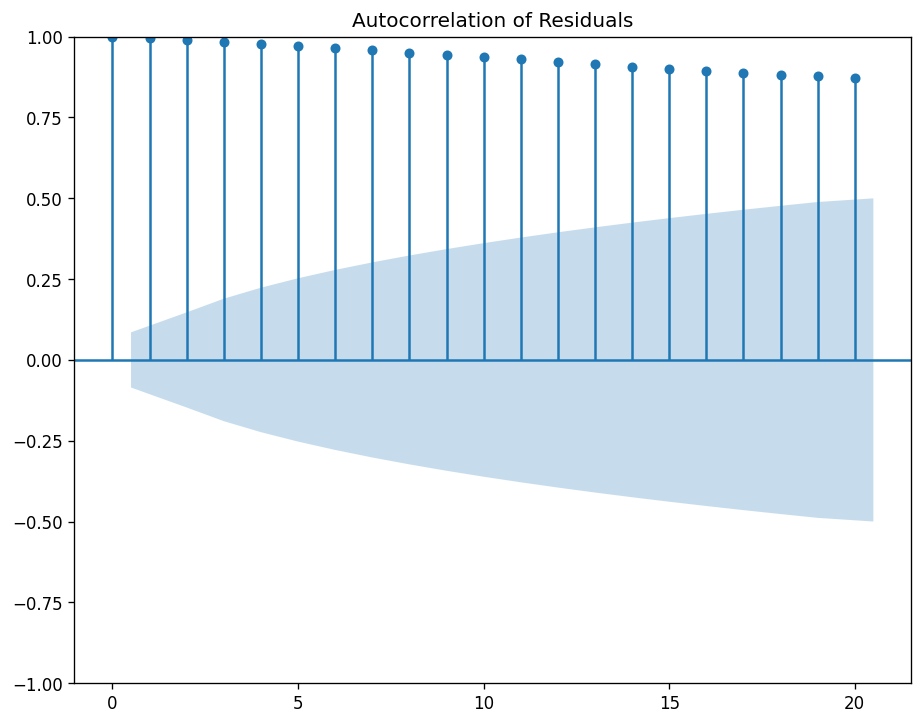

In [53]:
from sklearn.metrics import mean_absolute_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Mean Absolute Error (MAE)
mae = mean_absolute_error(test, predictions)
print(f'Mean Absolute Error (MAE): {mae}')

# Mean Squared Error (MSE)
mse = mean_squared_error(test, predictions)
print(f'Mean Squared Error (MSE): {mse}')

# R-square
r2 = r2_score(test, predictions)
print(f'R-squared: {r2}')

# Residual Analysis
residuals = test - predictions
sns.histplot(residuals, kde=True)
plt.title('Residual Distribution')
plt.show()

# Visualize actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(test, label='Actual')
plt.plot(predictions, label='Prediction')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

# Residual Plot
plt.figure(figsize=(12, 6))
plt.scatter(test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.show()

# Autocorrelation of Residuals
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(residuals, lags=20)
plt.title('Autocorrelation of Residuals')
plt.show()

**Mean Absolute Error (MAE)**:

- The MAE is a measure of the average absolute errors between the actual and predicted values. In this case, the MAE is 92.79.
- This means, on average, the model's predictions are off by approximately 92.79 units.

**Mean Squared Error (MSE)**:

- The MSE is a measure of the average squared errors between the actual and predicted values. In this case, the MSE is 13487. Which is a really bad score.

**R-squared:**

- R-squared measures the proportion of the variance in the dependent variable that is predictable from the independent variable(s). In this case, R-squared is -0.054.
- A negative R-squared suggests that the model is not explaining much of the variability in the data, and it might be worse than a simple mean-based model.

**Residual Plots**:
- We can see from the plots that the predicted numbers a straight horizontal line is on the average ending point. This means that the residuals will be dependent on the the average difference.
- This is due to the complexity of the data, the model cannot find a pattern and takes the average as a prediction.

**Conclusion**:
The model's performance, as indicated by the given metrics, is not satisfactory. The MAE and MSE values are relatively high, and the negative R-squared indicates that the model is not providing a meaningful fit to the data.

Mean Absolute Error (MAE): 93.75061423440488
Mean Squared Error (MSE): 13054.840531048918
R-squared: -0.012769842028093281


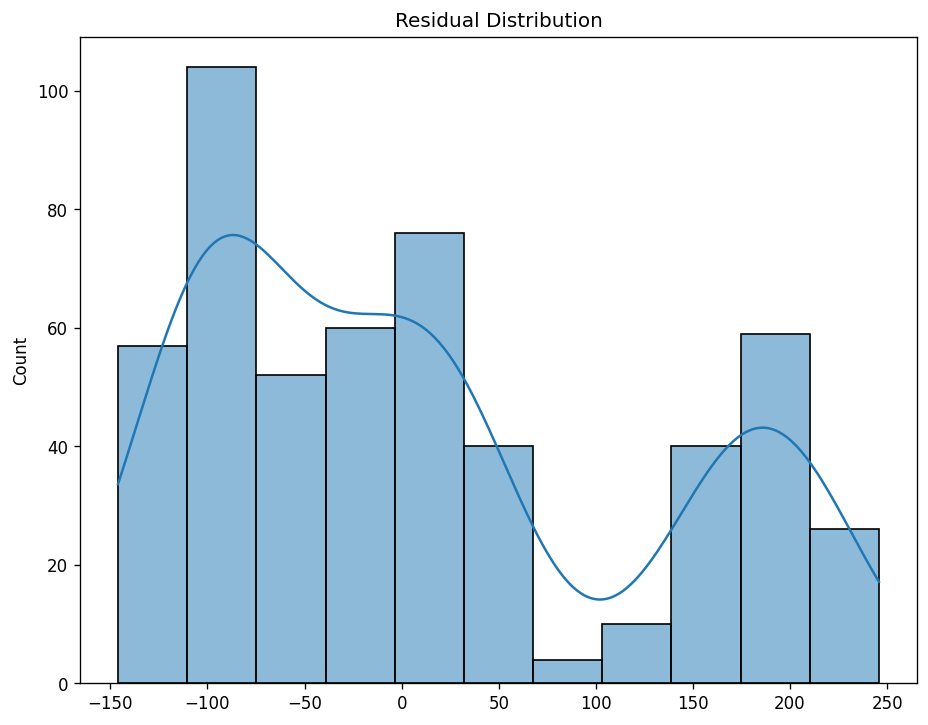

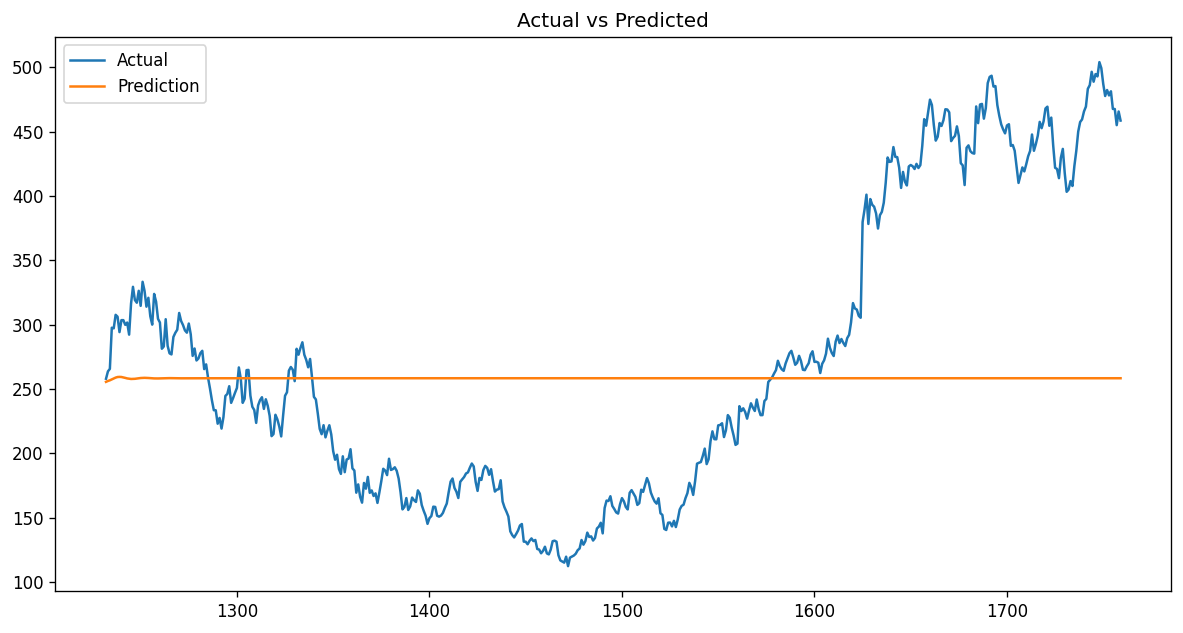

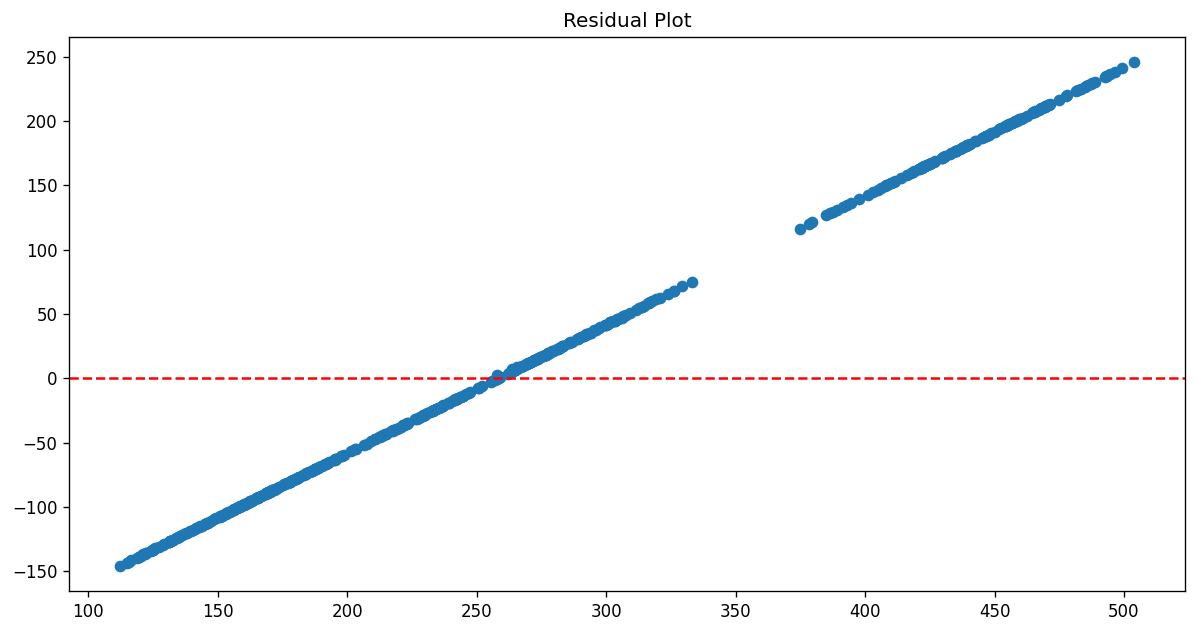

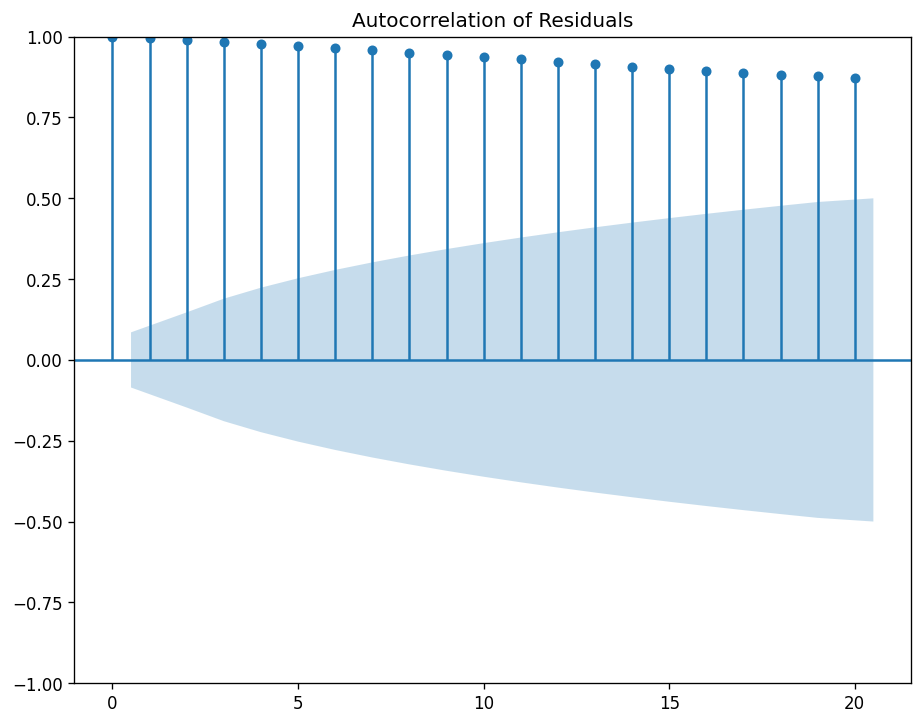

In [54]:
# Mean Absolute Error (MAE)
mae2 = mean_absolute_error(test, predictions2)
print(f'Mean Absolute Error (MAE): {mae2}')

# Mean Squared Error (MSE)
mse2 = mean_squared_error(test, predictions2)
print(f'Mean Squared Error (MSE): {mse2}')

# R-square
r2_2 = r2_score(test, predictions2)
print(f'R-squared: {r2_2}')

# Residual Analysis
residuals2 = test - predictions2
sns.histplot(residuals2, kde=True)
plt.title('Residual Distribution')
plt.show()

# Visualize actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(test, label='Actual')
plt.plot(predictions2, label='Prediction')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

# Residual Plot
plt.figure(figsize=(12, 6))
plt.scatter(test, residuals2)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.show()

# Autocorrelation of Residuals
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(residuals2, lags=20)
plt.title('Autocorrelation of Residuals')
plt.show()

**Mean Absolute Error (MAE)**:

- The MAE is a measure of the average absolute errors between the actual and predicted values. In this case, the MAE is 92.25.
- This means, on average, the model's predictions are off by approximately 92.25 units.

**Mean Squared Error (MSE)**:

- The MSE is a measure of the average squared errors between the actual and predicted values. In this case, the MSE is 13144.37. Which is a really bad score.

**R-squared:**

- R-squared measures the proportion of the variance in the dependent variable that is predictable from the independent variable(s). In this case, R-squared is -0.036.
- A negative R-squared suggests that the model is not explaining much of the variability in the data, and it might be worse than a simple mean-based model.

**Residual Plots**:
- We can see from the plots that the predicted numbers a straight horizontal line is on the average ending point. This means that the residuals will be dependent on the the average difference.
- This is due to the complexity of the data, the model cannot find a pattern and takes the average as a prediction.

**Conclusion**:
The model's performance, as indicated by the given metrics, is not satisfactory. The MAE and MSE values are relatively high, and the negative R-squared indicates that the model is not providing a meaningful fit to the data.

## Overall Conclusion on both models with Improvements:

Both models perform really bad, and with a reason:

1. The model is not using the optimal order. This can be fixed by writing a Auto Arima function to go over multiple orders at once and choosing the best one to use.

2. These models seem to be underfitting, even after increasing the order of error and calculation lags. This means that the algorithm cannot find a pattern or understand the complexity of this stock. Which is understandable since the ARIMA model performs best when having cyclical and seasonal data.

3. The type of model is not the right one to use. In the future we can explore the SARIMA model or a Machine Learning model like LSTM. These are better when it comes to complex data.

4. There is limited data that is included in the training of the data. In the future we could explore some feature selection and hyperparameter testing.